Linear Regression Mean Squared Error: 0.05245930616703595
Random Forest Accuracy: 0.967741935483871
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



C:\Users\reekr\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\reekr\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\reekr\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\reekr\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1000x600 with 0 Axes>

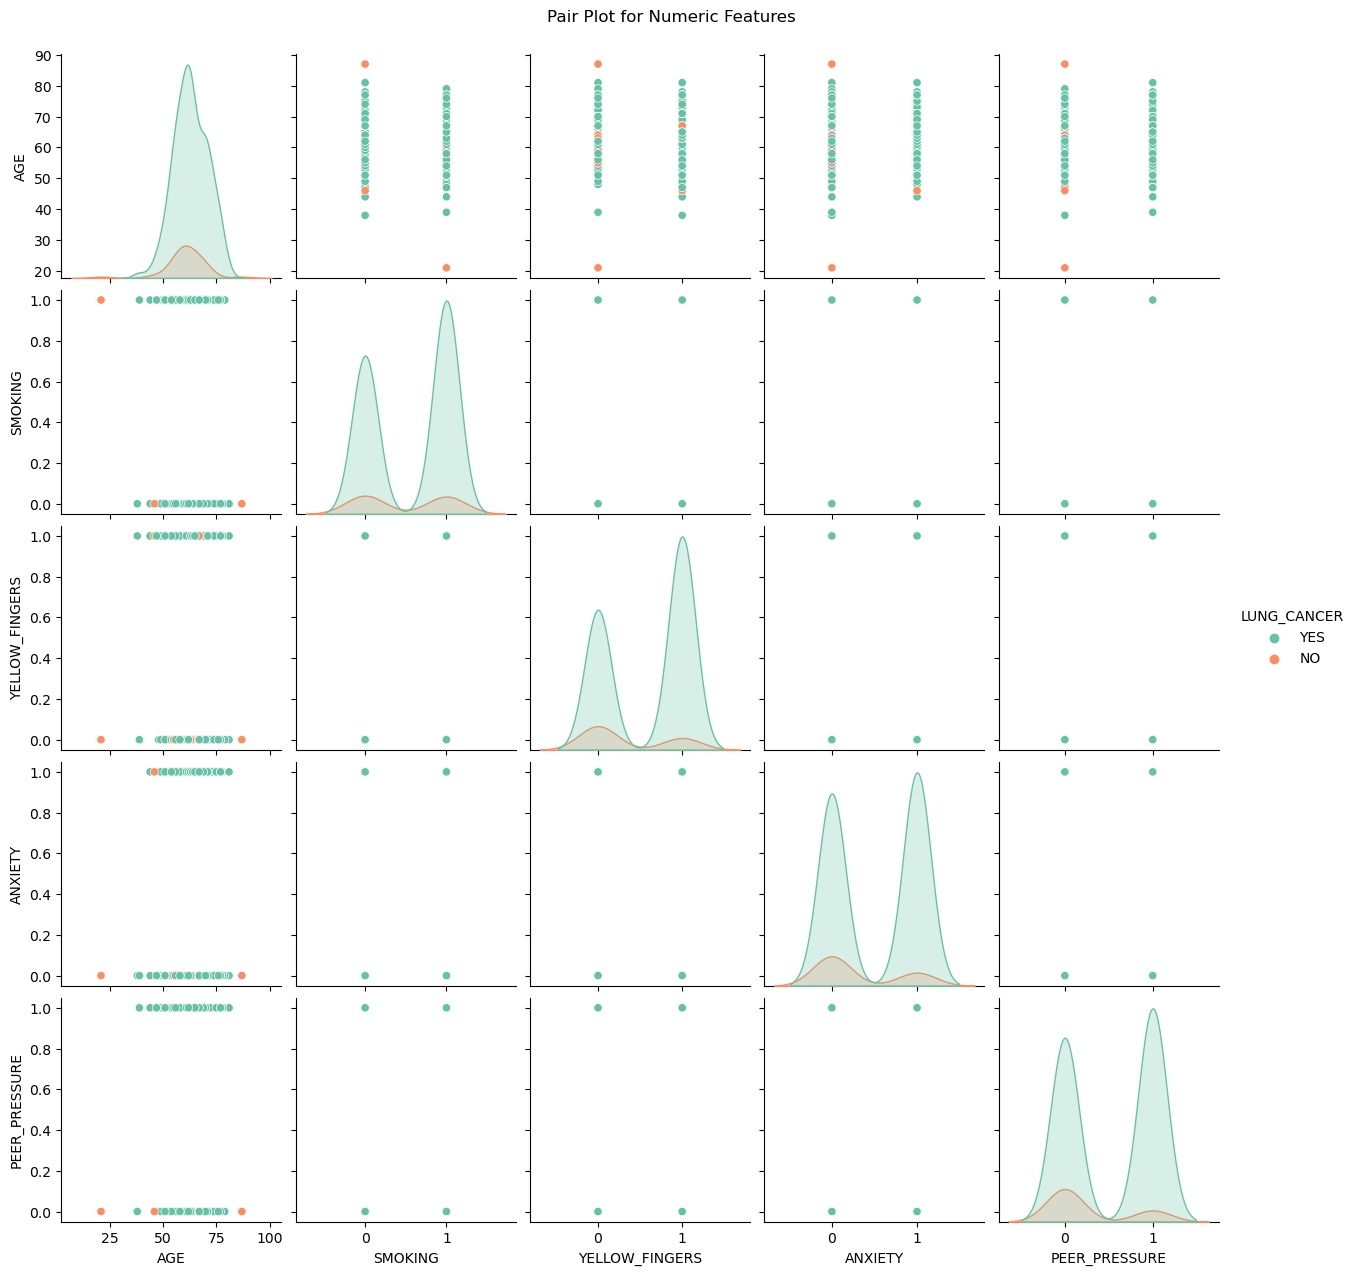

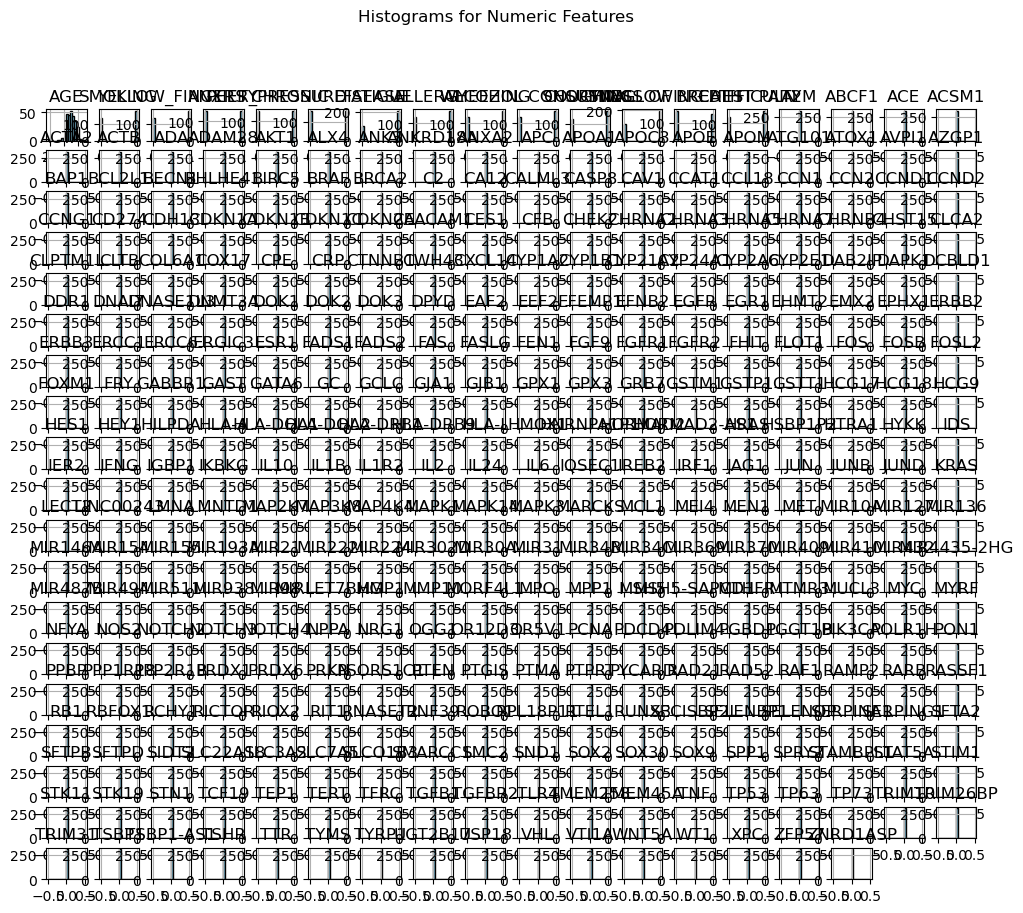

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

file1 = pd.read_csv(r"C:\Users\reekr\Downloads\file1.csv")
genes_data = pd.read_csv(r"C:\Users\reekr\Downloads\associated_genes.txt", sep="\t", header=0, names=["Disease name", "Associated genes"])

gene_encoding = genes_data.groupby("Disease name")["Associated genes"].apply(lambda x: list(x))
mlb = MultiLabelBinarizer()
encoded_genes = pd.DataFrame(mlb.fit_transform(gene_encoding), columns=mlb.classes_, index=gene_encoding.index)

file1 = file1.merge(encoded_genes, left_on="LUNG_CANCER", right_index=True, how="left")
file1.fillna(0, inplace=True)

categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

label_encoders = {}
for column in categorical_columns:
    if column in file1.columns:
        label_encoders[column] = LabelEncoder()
        file1[column] = label_encoders[column].fit_transform(file1[column])

X = file1.drop(['LUNG_CANCER'], axis=1)
y = file1['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", linear_mse)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Visualization 1: Pair Plot
numeric_columns = file1.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.pairplot(file1, vars=numeric_columns[:5], diag_kind='kde', hue='LUNG_CANCER', palette="Set2")
plt.suptitle("Pair Plot for Numeric Features", y=1.02)
plt.show()

# Visualization 2: Histogram for Numeric Features
file1[numeric_columns].hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms for Numeric Features")
plt.show()


Linear Regression Mean Squared Error: 0.05245930616703595
Random Forest Accuracy: 0.967741935483871
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



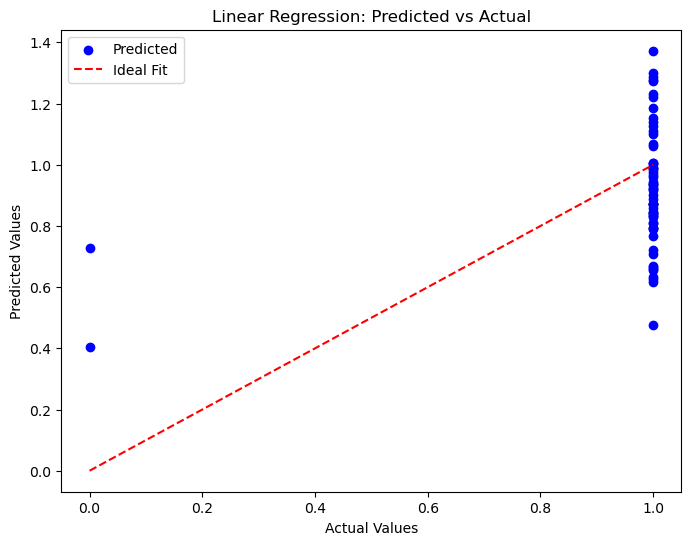

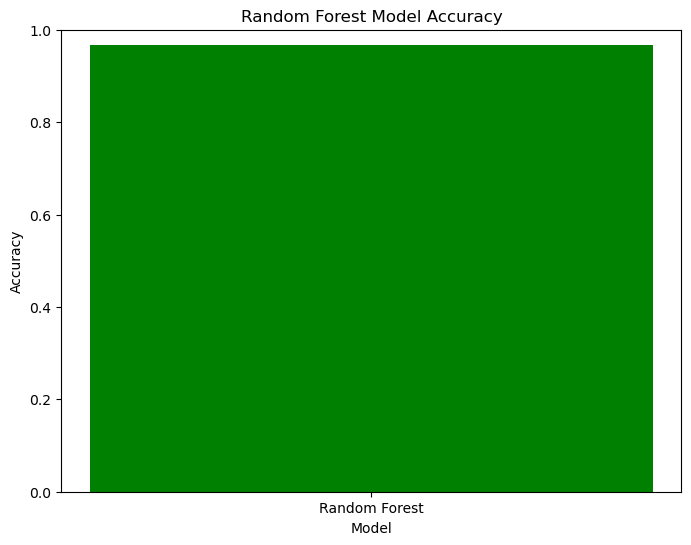

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load datasets
file1 = pd.read_csv(r"C:\Users\reekr\Downloads\file1.csv")
genes_data = pd.read_csv(r"C:\Users\reekr\Downloads\associated_genes.txt", sep="\t", header=0, names=["Disease name", "Associated genes"])

# Encode associated genes
gene_encoding = genes_data.groupby("Disease name")["Associated genes"].apply(lambda x: list(x))
mlb = MultiLabelBinarizer()
encoded_genes = pd.DataFrame(mlb.fit_transform(gene_encoding), columns=mlb.classes_, index=gene_encoding.index)

# Merge the gene data into the main dataset
file1 = file1.merge(encoded_genes, left_on="LUNG_CANCER", right_index=True, how="left")
file1.fillna(0, inplace=True)

# Label encoding for categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

label_encoders = {}
for column in categorical_columns:
    if column in file1.columns:
        label_encoders[column] = LabelEncoder()
        file1[column] = label_encoders[column].fit_transform(file1[column])

# Splitting dataset into features (X) and target (y)
X = file1.drop(['LUNG_CANCER'], axis=1)
y = file1['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", linear_mse)

# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Linear Regression Graph: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Accuracy Chart for Random Forest Model
plt.figure(figsize=(8, 6))
model_accuracy = [rf_accuracy]
model_names = ['Random Forest']
plt.bar(model_names, model_accuracy, color='green')
plt.title('Random Forest Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


Linear Regression Mean Squared Error: 0.05245930616703595
Random Forest Accuracy: 0.967741935483871
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



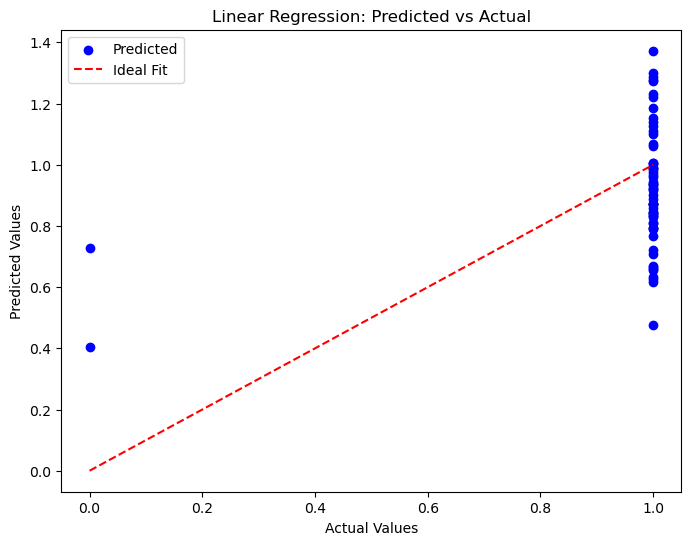

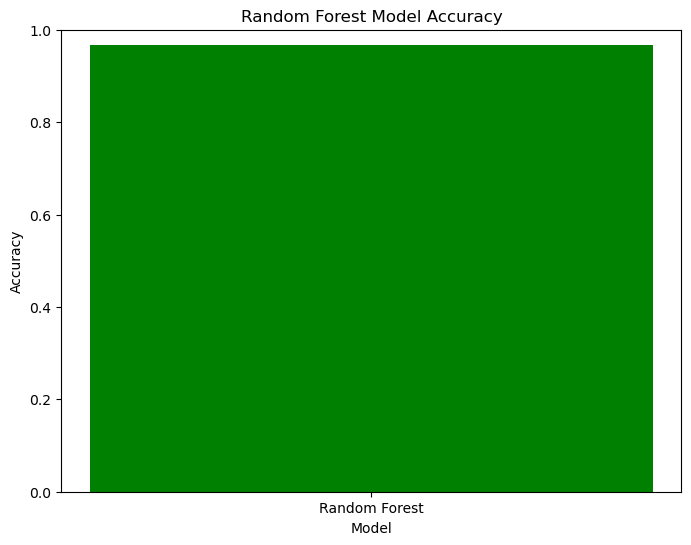

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

# Load datasets
file1 = pd.read_csv(r"C:\Users\reekr\Downloads\file1.csv")
genes_data = pd.read_csv(r"C:\Users\reekr\Downloads\associated_genes.txt", sep="\t", header=0, names=["Disease name", "Associated genes"])

# Encode associated genes
gene_encoding = genes_data.groupby("Disease name")["Associated genes"].apply(lambda x: list(x))
mlb = MultiLabelBinarizer()
encoded_genes = pd.DataFrame(mlb.fit_transform(gene_encoding), columns=mlb.classes_, index=gene_encoding.index)

# Merge the gene data into the main dataset
file1 = file1.merge(encoded_genes, left_on="LUNG_CANCER", right_index=True, how="left")
file1.fillna(0, inplace=True)

# Label encoding for categorical columns
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 
                       'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

label_encoders = {}
for column in categorical_columns:
    if column in file1.columns:
        label_encoders[column] = LabelEncoder()
        file1[column] = label_encoders[column].fit_transform(file1[column])

# Splitting dataset into features (X) and target (y)
X = file1.drop(['LUNG_CANCER'], axis=1)
y = file1['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression Mean Squared Error:", linear_mse)

# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Linear Regression Graph: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predicted')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Accuracy Chart for Random Forest Model
plt.figure(figsize=(8, 6))
model_accuracy = [rf_accuracy]
model_names = ['Random Forest']
plt.bar(model_names, model_accuracy, color='green')
plt.title('Random Forest Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

validation_generator.reset()

val_steps = np.ceil(validation_generator.samples / validation_generator.batch_size)

predictions = model.predict(validation_generator, steps=val_steps, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CNN Model on Validation Data")
plt.show()


NameError: name 'validation_generator' is not defined